# Drone-based Pollution Cleanup Optimization - Jupyter Notebook Template

### Algorithm Design Course Project Part II

### Student Name: Joshua Maharaj
### Date: 04/25/2025

# Introduction
An environmental protection agency has deployed one AI-powered drone to clean pollution hotspots scattered across a region. Each hotspot requires a specific amount of energy to clean and has a unique importance level based on environmental impact. I must find an optimal implementation by analysing and designing the brute force and divide and conquer strategies which will lead to the drone's best possible clean-up solution based on specifications such as the drone's battery capacity(1000 energy units per mission), cleaning efficiency(1 energy unit cleans 1 unit of pollution) and travel cost(round-trip travel consumes the specified number of energy units). We are given a sample dataset which has the specifications of 100 hotspots and must determine how to get the most out of the drone for a singular mission.

In [16]:
# Problem Dataset (100 Hotspots)

hotspots = [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15),
            (6, 80, 60, 20), (7, 150, 70, 30), (8, 50, 25, 10), (9, 110, 55, 18), (10, 95, 45, 22),
            (11, 85, 35, 12), (12, 130, 90, 28), (13, 75, 40, 16), (14, 105, 60, 24), (15, 65, 30, 14),
            (16, 115, 70, 26), (17, 55, 20, 8), (18, 140, 85, 32), (19, 100, 50, 20), (20, 125, 75, 30),
            (21, 80, 50, 14), (22, 68, 38, 1), (23, 114, 74, 18), (24, 67, 27, 22), (25, 94, 50, 15),
            (26, 78, 70, 11), (27, 156, 77, 38), (28, 52, 19, 0), (29, 116, 64, 17), (30, 104, 52, 28),
            (31, 91, 35, 3), (32, 138, 98, 36), (33, 78, 30, 18), (34, 108, 50, 29), (35, 58, 39, 9),
            (36, 113, 78, 30), (37, 63, 21, 0), (38, 148, 83, 42), (39, 108, 43, 15), (40, 117, 70, 24),
            (41, 90, 48, 13), (42, 71, 39, 17), (43, 112, 90, 21), (44, 65, 28, 35), (45, 101, 50, 5),
            (46, 71, 57, 17), (47, 148, 78, 21), (48, 50, 24, 3), (49, 109, 52, 27), (50, 91, 49, 16),
            (51, 91, 35, 17), (52, 135, 87, 31), (53, 72, 34, 23), (54, 114, 50, 27), (55, 62, 38, 6),
            (56, 111, 69, 19), (57, 61, 24, 2), (58, 131, 92, 23), (59, 92, 56, 24), (60, 117, 85, 22),
            (61, 80, 36, 23), (62, 79, 36, 3), (63, 129, 71, 26), (64, 56, 16, 28), (65, 109, 59, 12),
            (66, 88, 53, 21), (67, 140, 72, 35), (68, 54, 24, 2), (69, 110, 50, 16), (70, 101, 41, 24),
            (71, 86, 35, 2), (72, 120, 86, 29), (73, 67, 45, 13), (74, 111, 70, 25), (75, 60, 27, 15),
            (76, 106, 74, 25), (77, 58, 23, 1), (78, 131, 78, 42), (79, 93, 50, 14), (80, 127, 72, 21),
            (81, 97, 40, 13), (82, 75, 20, 3), (83, 120, 81, 27), (84, 66, 25, 32), (85, 106, 45, 14),
            (86, 79, 70, 29), (87, 153, 77, 32), (88, 46, 31, 11), (89, 109, 54, 10), (90, 93, 49, 29),
            (91, 77, 32, 3), (92, 122, 85, 25), (93, 76, 49, 8), (94, 115, 52, 20), (95, 75, 36, 23),
            (96, 108, 70, 19), (97, 60, 16, 15), (98, 134, 92, 38), (99, 108, 51, 14), (100, 123, 65, 33)]


battery_capacity = 1000

# a) Solution Description - Brute Force Approach
## The brute force method will explore all possible hotspot selections per mission while ensuring the drone does not exceed its battery capacity(100 units of energy). It will do the following:

- Generate all possible subsets of hotspots for each mission.
- For each subset, compute the total energy required (energy units for cleaning + travel), total priority score and if the subset is feasible (energy <= 1000).
- If feasible and has the highest priority score so far, update the best solution.
- Select the subset with the highest total priority in the end after doing these calculations for all possibilities.

# b) Complexity Analysis - Brute Force

### Analysis of asymptotic time and space complexity based on my pseudocode:

The asymptotic complexity of the Greedy Approach to this drone clean up project is O(2^n * n), where n is the number of hotspots in the graph. This is the time complexity because the greedy approach ensures that all possible subsets of hotsports is checked to see if it is valid or not for the mission. It will not be O(n!) because we do not care about the order of how hotspots will be visited in the mission. Furthermore, it takes O(n) time to sum up the energy (clean up and travel) for each subset, so we must multiply the larger O(2^n) by 'n' times to accound for getting the sum of the energies for each hotspot visited in that subset.

The space complexity of this problem is O(2^n) because the subset must be stored in a data structure for the algorithm to reference and is updated with the most optimal solution after each iteration instead of storing all possible subsets at the same time.

### Graph Analysis

The graph shows an exponential increase in execution time as the number of hotspots grows. This shows the O(2^n) time complexity of the brute force approach, where execution time doubles with each additional hotspot. As a result, the algorithm quickly becomes inefficient or too long to process after 13 hotspots, making it unsuitable for larger datasets like the one provided to us with 1000 hotspots. This shows the need for more efficient algorithms, such as the greedy approach, which may significantly reduce time cost.

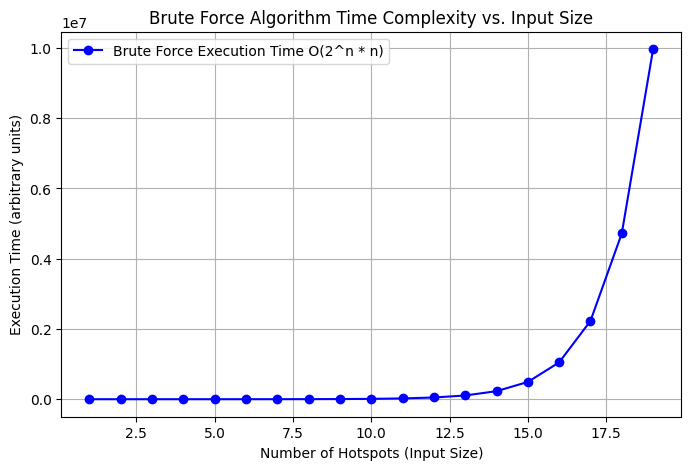

In [17]:
import matplotlib.pyplot as plt # import to create graph

# Graph showing the Brute Force Approach time complexity
hotspots = list(range(1, 20))  # only use 20 hotspots to avoid excessive computational time
time_taken = [((2**i)*i) for i in hotspots]  # exponential time complexity


plt.figure(figsize=(8, 5))
plt.plot(hotspots, time_taken, marker='o', linestyle='-', color='b', label='Brute Force Execution Time O(2^n * n)')
plt.xlabel('Number of Hotspots (Input Size)')
plt.ylabel('Execution Time (arbitrary units)') # units not specified because this is just a showcase of how the program should theoretically run
plt.title('Brute Force Algorithm Time Complexity vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()


# c) Proof of Correctness - Brute Force
Select a key function/loop and prove its correctness using loop invariants/induction.

## Loop invariant proof
The brute force algorithm generates all possible subsets of hotspots and picks the one with the highest priority score while staying within the energy limit. I will prove that after iterating through all subsets, the algorithm correctly selects the optimal subset. The loop invariant is taken from this part of my psuedocode:

##### best_priority = 0,  best_subset = []
for each subset in power_set(hotspots):
        total_energy = 0
        total_priority = 0

        for hotspot in subset:
            id, priority, cleaning, travel = hotspot
            total_energy += cleaning + travel

            if total_energy ≤ battery_capacity:
                total_priority = sum(priority * (cleaning / full_cleaning) for each hotspot in subset)
                if total_priority > best_priority:
                    best_priority = total_priority
                    best_subset = subset


### Invariant:

The variable best_subset stores the subset that achieves this best priority score while satisfying the energy constraints of staying within the specified battery capacity of 1000 energy untis per mission.


### Initialization:

Before the loop starts, best_priority = 0 and best_subset = [], which correctly represents the fact that no subsets have been checked yet and the mission has not started.

### Maintenance (Inductive Step):

For each subset, we calculate its total energy = cleaning + travel.
If the subset is valid (when total energy <= battery capacity), we get its sum of priority scores for all hotspots(full or partial) in the subset.
If this subset has a higher priority score than best_priority, we update best_priority and best_subset.
This ensures that during every iteration of this loop, best_priority and best_subset store the best selection found so far.

### Termination:

When the loop finishes, all possible valid subsets have been checked.
Since the algorithm updates best_priority only when a better valid subset is found, the final value of best_priority is the maximum possible priority score that is feasible.
Thus, the algorithm correctly outputs the optimal selection.

### Conclusion:

Using the loop invariant principles I clearly proved that the variables best_subset and best_priority will always hold the most optimal subset of hotspots and the highest priority score possible between those subsets before entering the loop, during the loop and at the end of the function.

# d) Implementation - Brute Force Solution
Implement and comment your brute force solution here.

In [18]:
from itertools import combinations

def brute_max_priority(hotspots, battery_capacity):
    best_subset, best_priority, total_energy_used = [], 0, 0

    # generate all subsets from hotspot list
    for r in range(1, len(hotspots) + 1):
        for subset in combinations(hotspots, r): # get all combinations of hotspots possible
            total_energy = 0 # energy used so far on mission
            total_priority = 0 # priority accumulated so far on mission
            selected_hotspots = [] # subset of current hotspots

            for h in subset:
                hotspot_id, priority, cleaning, travel = h # hotspot data is separated for easier info processing
                energy_needed = cleaning + travel # energy consumed to 'complete' cleanup of hotspot

                # check if entire hotspot can be cleaned without exceeding battery
                if total_energy + energy_needed <= battery_capacity:
                    total_energy += energy_needed
                    total_priority += priority  # full cleaning = full priority
                    selected_hotspots.append(hotspot_id)  # add to current subset of hotspots
                # fractional part not required

            if total_priority > best_priority:
                best_priority = total_priority # update optimal solution and priority
                best_subset = selected_hotspots
                total_energy_used = total_energy

    return best_priority, best_subset, total_energy_used # return values



# test run
hotspots = [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15)]
battery_capacity = 1000
priority, subset, tot_energy = brute_max_priority(hotspots, battery_capacity)

print(f"Max Priority: {priority}, Energy Used: {tot_energy}")
print(f"Optimal Hotspots: {subset}")


Max Priority: 440, Energy Used: 320
Optimal Hotspots: [1, 2, 3, 4, 5]


# e) Performance Testing - Brute Force
Run brute force on small datasets and collect timing data.
Plot graph of execution time vs. input size.

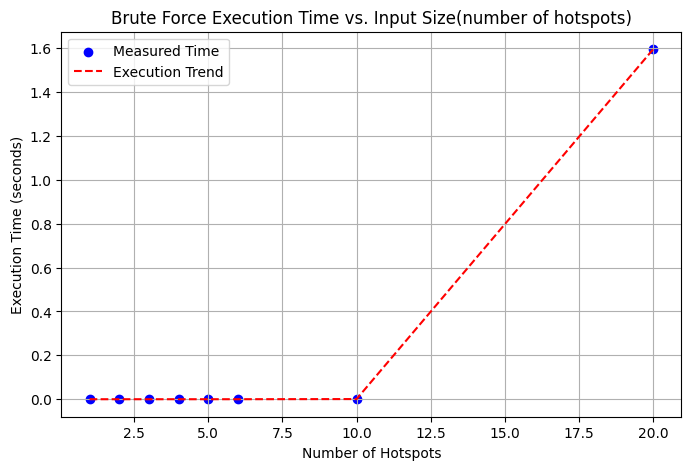

In [19]:
import time
import matplotlib.pyplot as plt

# hotspot datasets with varying lengths 1,2,3,4,5,6,10,20
hotspots_list = [
    [(1, 90, 40, 20)], # 1 hotspot
    [(1, 90, 40, 20), (2, 70, 30, 10)], # 2 hotspots
    [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25)], # 3 hotspots
    [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30)], # 4 hotspots
    [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15)], # 5 hotspots
    [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15), (6, 80, 60, 20)], # 6 hotspots
    [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15),(6, 80, 60, 20), (7, 150, 70, 30), (8, 50, 25, 10), (9, 110, 55, 18), (10, 95, 45, 22)], # 10 hotspots
    [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15),
    (6, 80, 60, 20), (7, 150, 70, 30), (8, 50, 25, 10), (9, 110, 55, 18), (10, 95, 45, 22),
    (11, 85, 35, 12), (12, 130, 90, 28), (13, 75, 40, 16), (14, 105, 60, 24), (15, 65, 30, 14),
    (16, 115, 70, 26), (17, 55, 20, 8), (18, 140, 85, 32), (19, 100, 50, 20), (20, 125, 75, 30)] # 20 hotspots


]

# measure execution time for different hotspot list sizes
def measure_time(hotspots_list, battery_capacity):
    times, sizes = [], [] # to store x and y graph values

    # loop through all hotspots in each entry of subsets
    for hotspots in hotspots_list:
        start_time = time.time() # start timer
        brute_max_priority(hotspots, battery_capacity)  # simulate brute force solution
        end_time = time.time() # end timer
        tot_time = end_time - start_time # get time taken for solution to run
        times.append(tot_time)
        sizes.append(len(hotspots))

    return sizes, times

# call measure time function
sizes, execution_times = measure_time(hotspots_list, battery_capacity)

# plot results
plt.figure(figsize=(8, 5))
plt.scatter(sizes, execution_times, color='b', label="Measured Time")
plt.plot(sizes, execution_times, linestyle="--", color='r', label="Execution Trend")
plt.xlabel('Number of Hotspots')
plt.ylabel('Execution Time (seconds)')
plt.title('Brute Force Execution Time vs. Input Size(number of hotspots)')
plt.legend()
plt.grid(True)
plt.show()


### Graph Observations

From the plotted graph, it can be understood that after the hotspot dataset increases to over 10 different hotspots, then the execution time begins to steer away from constant O(1) and move exponentially O(2^n * n). This is because as the dataset becomes larger, the total number of possible combinations of hotspots being visited by the drone per mission grows exponentially, thus requiring more time to complete all the computations. We can see from the graph that this brute force approach will not be the most optimal for real world applications where a dataset could possibly have 1 million different locations. However, this approach is ideal for smaller datasets(less than 10) according to the graph.

# f) Solution Description - Greedy Approach
## The greedy method will explore only the local optima which is the best hotspot based on a priority score to energy ratio. It will use this approach to select hotspots one by one to create a valid subset not exceeding the battery capacity as opposed to generating all possible hotspot selections at the beginning of the function. It will do the following:

- Initially the solution set is empty. (Initialization)
- Calculate the priority/total energy ratio of all hotspots, sort them in non ascending order and choose the hotspot with the highest ratio . (selection procedure)
- After picking this hotspot, ensure it is a valid choice, meaning that the battery capacity is not exceeded after adding this hotspot to the solution set. Either add it fully or partially if there is not enough battery capacity to fully clean the hotspot. (feasibility check)
- See if the value of energy used is equal to the battery capacity. If yes, then the solution is achieved.(solution check)


function greedy_max_priority(hotspots, battery_capacity):
    # initialization
    solution_priority = 0
    solution_subset = []

    # Compute priority/energy ratio
    for each hotspot in hotspots:
        priority_ratio = priority / (cleaning + travel)
        store (hotspot_id, priority, cleaning, travel, priority_ratio) in a list

    sort the list in descending order by priority_ratio

    consumed_energy = 0 # initialization ends here

    
    for each hotspot in priority_ratio_list: # selection procedure
        if consumed_energy + cleaning + travel <= battery_capacity: # feasibility check
            # fully clean this hotspot
            solution_subset.append((hotspot_id, cleaning))
            solution_priority += priority
            consumed_energy += cleaning + travel
        else: # feasibility check as well for fractional
            # clean as much as possible
            remaining_energy = battery_capacity - consumed_energy
            if remaining_energy > travel:  # check if hotspot can be visited
                cleanable = remaining_energy - travel  # use energy left for cleaning
                fraction_cleaned = cleanable / cleaning
                solution_priority += priority * fraction_cleaned
                solution_subset.append((hotspot_id, cleanable))
                consumed_energy = battery_capacity  # Battery fully used

    return solution_priority, solution_subset, consumed_energy # solution check


# g) Complexity Analysis - Optimized Algorithm Greedy Approach
Analyze time and space complexity.
Plot graph to show time complexity vs. input size.

### Analysis of asymptotic time and space complexity based on my pseudocode:

The asymptotic complexity of the Greedy Approach to the drone cleanup problem is O(n log n), where n is the number of hotspots in the dataset. This is because the algorithm first calculates the priority ratio for n hotspots thus taking O(n) time. Then it sorts the hotspots based on this ratio, taking O(n log n) time. After sorting, the algorithm will select the first hotspot in the list either and choose to either fully or partially clean it until the battery energy runs out. This iteration step takes O(n) time. The operations within this loop such as the condition check and summing the energy per hotspot are in constant time O(1). Since O(n log n) dominates both O(1) and O(n), the overall time complexity is O(n log n).

The space complexity of this problem is O(n) because the algorithm only stores the subset of selected hotspots for the solution and the accumulated priority score.

### Graph Analysis  

From the graph, we observe a sub linear increase in execution time as the number of hotspots grows. This follows an O(n log n), meaning that while execution time increases with input size, it does so more efficiently than an exponential algorithm like the brute force algorithm. Compared to brute force, which becomes inefficient after going past 13 hotspots, the greedy approach can handle significantly larger datasets. However, for extremely large inputs, the sorting step still contributes to noticeable computational overhead.

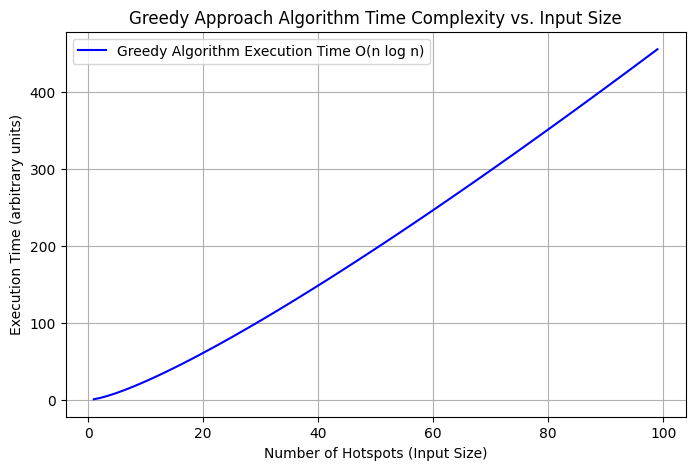

In [20]:
import matplotlib.pyplot as plt
import math

hotspots = list(range(1, 100))  # Input sizes from 1 to 1000
time_taken = [i * math.log(i + 1) for i in hotspots]  # avoid log(1) = 0 case

plt.figure(figsize=(8, 5))
plt.plot(hotspots, time_taken, linestyle='-', color='b', label='Greedy Algorithm Execution Time O(n log n)')
#plt.scatter(hotspots, time_taken, color='r', label="Greedy Approach Measured Time")
plt.xlabel('Number of Hotspots (Input Size)')
plt.ylabel('Execution Time (arbitrary units)')
plt.title('Greedy Approach Algorithm Time Complexity vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()


# h) Implementation - Optimized Algorithm
Implement and comment optimized solution here.

In [21]:
def greedy_max_priority(hotspots, battery_capacity):

    # calculate priority/energy ratio and sort in descending order
    sorted_hotspots = sorted(hotspots, key=lambda h: h[1] / (h[2] + h[3]), reverse=True)

    solution_priority = 0
    solution_subset = []
    consumed_energy = 0 # energy used so far for mission
    # initialization part till here

    for hotspot in sorted_hotspots: # selection procedure: loop through sorted list
        hotspot_id, priority, cleaning, travel = hotspot # get info for this hotspot
        energy_needed = cleaning + travel # find energy needed to complete hotspot cleanup

        # ensure we have enough energy to clean a hotspot firts
        if consumed_energy + energy_needed <= battery_capacity: # feasibility check
            # fully clean hotspot and add to solution set
            solution_subset.append(hotspot_id)
            solution_priority += priority
            consumed_energy += energy_needed
        else: # also feasibility check for fractional part
            # clean as much as possible of hotspot
            remaining_energy = battery_capacity - consumed_energy
            if remaining_energy > travel:
                cleanable = remaining_energy - travel  # energy that can be used for cleaning
                fraction_cleaned = cleanable / cleaning
                solution_priority += priority * fraction_cleaned # get priority proportional to % of hotspot cleaned
                solution_subset.append(hotspot_id) # add to solution set
                consumed_energy = battery_capacity  # no more battery energy
            break  # exit loop if battery is full

    return solution_priority, solution_subset # return necessary data

# test run
hotspots = [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25)]
battery_capacity = 135 # check if fractional works
priority, subset = greedy_max_priority(hotspots, battery_capacity)

print(f"Priority accumulated: {priority}")
print(f"Optimal Hotspots: {subset}")


Priority accumulated: 175.0
Optimal Hotspots: [2, 1, 3]


# i) Performance Testing and Comparison
Run and compare brute force vs. optimized algorithms.
Collect timing data, plot comparison graph.

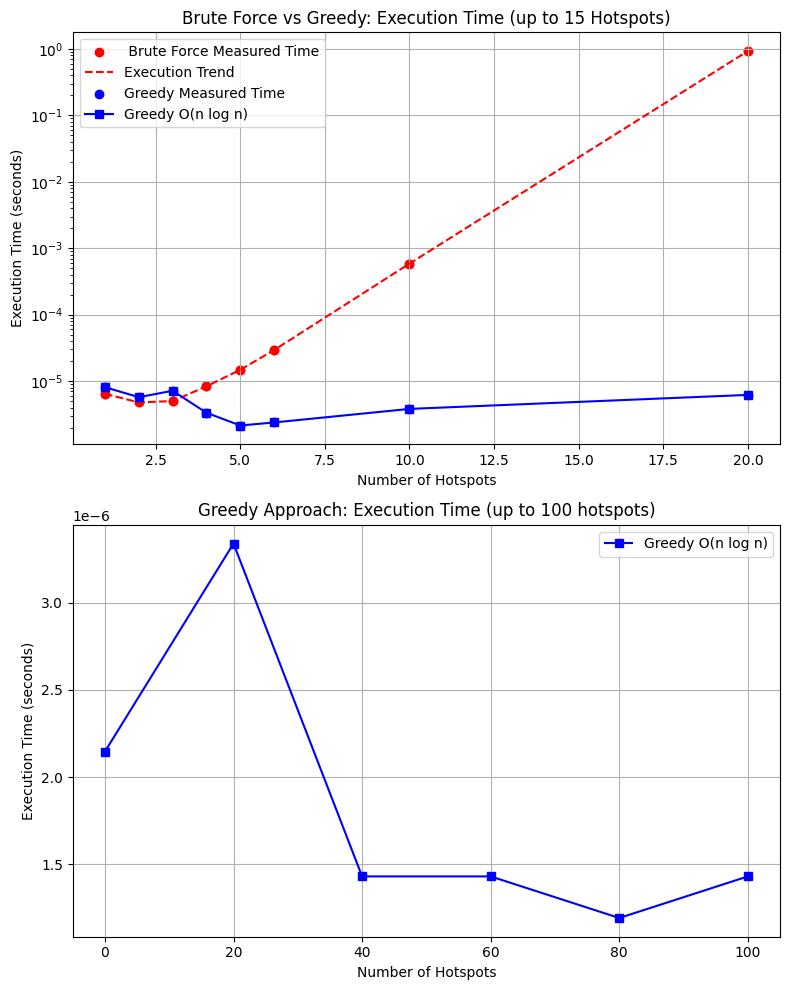

In [22]:
# call measure time function for brute force algorithm taken from part e
sizes, execution_times = measure_time(hotspots_list, battery_capacity)

# measure execution time for greedy approaches
def greedy_time(hotspots_list, battery_capacity):
    g_times, g_sizes = [], []  # list to store x and y values

    for hotspots in hotspots_list:
        start_time = time.time()
        greedy_max_priority(hotspots, battery_capacity)
        end_time = time.time()
        tot_time = end_time - start_time

        g_times.append(tot_time)  # add total time for solution to y values
        g_sizes.append(len(hotspots))  # add input size (number of hotspots) to x values

    return g_sizes, g_times  # return finished list of values

g1_sizes, g1_times = greedy_time(hotspots_list,battery_capacity) # greedy approach x and y values for 1st graph

big_sets = [0, 20, 40, 60, 80, 100]  # 100 hotspots for greedy approach graph
big_inputs = [hotspots[:size] for size in big_sets]
big_greedy_size, big_greedy_time = greedy_time(big_inputs, battery_capacity)

# make subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# 1st graph of brute force vs greedy on sets of 15 hotspots or less
axes[0].scatter(sizes, execution_times, color='r', label=" Brute Force Measured Time")
axes[0].plot(sizes, execution_times, linestyle="--", color='r', label="Execution Trend")
axes[0].scatter(g1_sizes, g1_times, color='b', label="Greedy Measured Time")
axes[0].plot(g1_sizes, g1_times, marker='s', linestyle='-', color='b', label='Greedy O(n log n)')
axes[0].set_title("Brute Force vs Greedy: Execution Time (up to 15 Hotspots)")
axes[0].set_xlabel("Number of Hotspots")
axes[0].set_ylabel("Execution Time (seconds)")
axes[0].set_yscale("log")  # log scale for better visual
axes[0].legend()
axes[0].grid(True)

# 2nd graph of greedy on larger hotspot sets
axes[1].plot(big_sets, big_greedy_time, marker='s', linestyle='-', color='b', label='Greedy O(n log n)')
axes[0].scatter(sizes, execution_times, color='r', label=" Greedy Measured Time")
axes[1].set_title("Greedy Approach: Execution Time (up to 100 hotspots)")
axes[1].set_xlabel("Number of Hotspots")
axes[1].set_ylabel("Execution Time (seconds)")
axes[1].set_yscale("linear")  # linear scale for beter visual
axes[1].legend()
axes[1].grid(True)

fig.tight_layout()
plt.show()


### Graph Observations

#### First Graph
In the first graph with the comparison of the brute force apprach against the greedy approach we see that as the dataset gets larger, the brute force approach becomes increasingly longer to computate but the greedy approach relatively stays along the same execution time. I only used a small dataset for this first graph because the brute force approach becomes very long to computate after around 20 hotspots because of its larger time complexity.

#### Second Graph
In the second graph, wse see the optimized solution with regards to time complexity. The greedy approach stays within a 2 second range for datasets ranging from 0 to 100, indicating that it is very time efficient in comparison to the brute force approach.

# Final Conclusion and Reflections
Summarize what you learned and discuss trade-offs between approaches.


Both approaches have their pros and cons. It depends on what is the main objective of the mission. If it is to get the highest priority without considering fractional hotspots possible per mission, then the brute force approach will find the optimal solution but will take longer to computate especially for cases where there is a larger dataset. If the objective is to find a solution as fast as possible including fractional cleanups, then the greedy approach works better than the brute force approach because it only generates one solution as opposed to the brute force approach where all possible valid solutions are generated then an optimal solution is choosen. This approach will always give you the optimal solution except if fractional cleanups are not allowed because there may be a remainder of energy that is left unused.

After completing this project, I understand that using the greedy approach is optimal. But another approach such as the divide and conquer strategy may also generate an optimal solution for maximising priority per mission. This apporach could bmaybe be explored in future projects. By doing the psueodcodes and visual representations of each approach, it became easier to understand each approach and how they can be utilised for different reasons. Overall, this project helped me better understand how different algorithm strategies can be implemented to solve the same problem.

# Drone-based Pollution Cleanup Optimization - Jupyter Notebook Template

### Algorithm Design Course Project Part II

### Student Name: Joshua Maharaj
### Date: 04/25/2025

# Introduction
An environmental protection agency has deployed one AI-powered drone to clean pollution hotspots scattered across a region. Each hotspot requires a specific amount of energy to clean and has a unique importance level based on environmental impact. I must find an optimal implementation by analysing and designing the brute force and divide and conquer strategies which will lead to the drone's best possible clean-up solution based on specifications such as the drone's battery capacity(1000 energy units per mission), cleaning efficiency(1 energy unit cleans 1 unit of pollution) and travel cost(round-trip travel consumes the specified number of energy units). We are given a sample dataset which has the specifications of 100 hotspots and must determine how to get the most out of the drone for a singular mission.

# a) Solution Description - Brute Force Approach
## The brute force method will explore all possible hotspot selections per mission while ensuring the drone does not exceed its battery capacity(100 units of energy). It will do the following:

- Generate all possible subsets of hotspots for each mission.
- For each subset, compute the total energy required (energy units for cleaning + travel), total priority score and if the subset is feasible (energy <= 1000).
- If feasible and has the highest priority score so far, update the best solution.
- Select the subset with the highest total priority in the end after doing these calculations for all possibilities.

# b) Dynamic Programming Psuedocode

input: hotspots - list of hotspots
input: capacity - energy capacity of 1000 units
output: max prioirity, subset of correspondinh hotspots
### Algorithm dp_max_priority ###

    dp_max_priority(hotspots, capacity):
    n = number of hotspots
    dp = 2D array of size (n+1) x (capacity+1), initialized to 0

    for i from 1 to n:
        energy_cost = hotspots[i-1].cleaning_effort + hotspots[i-1].travel_cost
        priority = hotspots[i-1].priority_score

        for w from 0 to capacity:
            if energy_cost <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w - energy_cost] + priority)
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][capacity]  // Max total priority


# c) Theoretical Time Complexity Analysis based on my Psuedocode

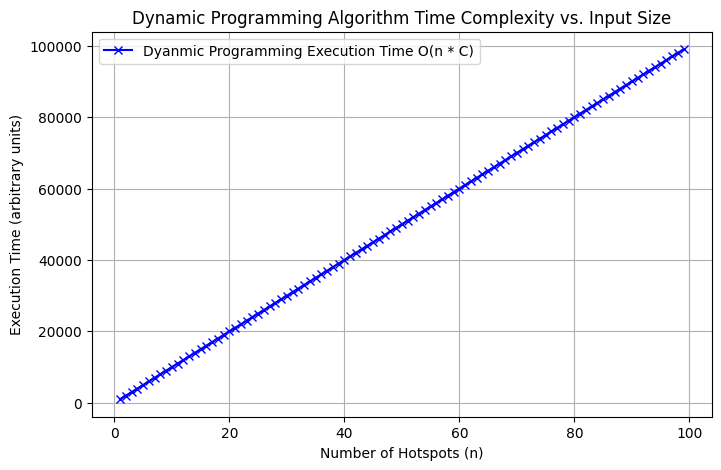

In [23]:
import matplotlib.pyplot as plt # import to create graph

# Graph showing the DP approach time complexity
hotspots = list(range(1,100))
C = 1000
times_taken = [C * i for i in hotspots]

plt.figure(figsize=(8, 5))
plt.plot(hotspots, times_taken, marker='x', color='b', label='Dyanmic Programming Execution Time O(n * C)')
plt.title('Theoretical Time Complexity O(n * C)')
plt.xlabel('Number of Hotspots (n)')
plt.ylabel('Execution Time (arbitrary units)')
plt.title('Dynamic Programming Algorithm Time Complexity vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()






### Asymptotic Time and Space Complexity Analysis

The asymptotic complexity of the Dynamic Programming (DP) approach for this drone cleanup problem is O(n × C), where n is the number of hotspots in the dataset and C is the drone's battery capacity (in this case, 1000 energy units).  

This time complexity arises from the fact that the algorithm systematically fills a 2D table, where the dimensions represent:
- the number of hotspots considered (ranging from 0 to n)  
- the remaining battery capacity (ranging from 0 to C)

For each table cell, the algorithm performs a O(1) calculation of either skipping the current hotspot or including it if the total energy fits. Since there are n × C possible combinations of these states, the total time complexity is proportional to that product.

The space complexity is also O(n × C) because the algorithm must store an entry for each possible state's hotspot index and remaining battery capacity to avoid recomputation of sub-problem solutions and enable them to be efficiently retireved to get end solution.


### Graph Analysis

The graph for the dynamic programming solution shows a polynomial growth in execution time as the number of hotspots increases, which matches the expected O(n × C) behavior. Unlike the brute force approach, which exhibits exponential time growth(0(2^n * n)) and becomes practically unusable beyond about 13–15 hotspots, the dynamic programming algorithm scales much more gracefully. This makes it especially suitable for larger datasets such as the one given which has 100 hotspots.

This analysis highlights why dynamic programming is a more practical and efficient solution for this problem as it guarantees the optimal result while maintaining predictable and manageable execution times, even for reasonably large input sizes.



# d) Implementation - Dynamic Programming Solution¶

Implement and comment your dynamic programming solution here.

In [24]:
def dp_max_priority(hotspots, capacity):
    n = len(hotspots)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)] # initialize a 2D array of size (n+1) x (capacity+1) with zeros.

    # fill array with corresponding values
    for i in range(1, n + 1):
        hotspot_id, priority, cleaning_effort, travel_cost = hotspots[i - 1]
        total_energy_cost = cleaning_effort + travel_cost  # must be able to clean entire hotspot (NO fractional)

        for w in range(capacity + 1):
            if total_energy_cost > w:
                dp[i][w] = dp[i - 1][w]  # skip hotspot if too costly
            else:
                # decide: skip or include the hotspot
                dp[i][w] = max(
                    dp[i - 1][w],  # Skip
                    dp[i - 1][w - total_energy_cost] + priority  # Take
                )

    # Backtrack to find the selected hotspots
    selected_hotspots = []
    w = capacity
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            hotspot_id = hotspots[i - 1][0]
            selected_hotspots.append(hotspot_id)
            w -= hotspots[i - 1][2] + hotspots[i - 1][3]

    selected_hotspots.reverse()  # return in original order
    max_priority = dp[n][capacity]

    return max_priority, selected_hotspots # return both max priority score and hotspots to get this score

# test run:
test_hotspots = [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15)]
battery_capacity = 1000
max_priority, selected = dp_max_priority(test_hotspots, battery_capacity)
print(f"Maximum Priority Score: {max_priority}")
print(f"Selected Hotspot IDs: {selected}")


Maximum Priority Score: 440
Selected Hotspot IDs: [1, 2, 3, 4, 5]


# e) Performance Testing - Dynamic Programming
Run dynamic programming solution on given dataset and collect timing data

In [25]:
battery_capacity = 1000
hotspots = [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15),
            (6, 80, 60, 20), (7, 150, 70, 30), (8, 50, 25, 10), (9, 110, 55, 18), (10, 95, 45, 22),
            (11, 85, 35, 12), (12, 130, 90, 28), (13, 75, 40, 16), (14, 105, 60, 24), (15, 65, 30, 14),
            (16, 115, 70, 26), (17, 55, 20, 8), (18, 140, 85, 32), (19, 100, 50, 20), (20, 125, 75, 30),
            (21, 80, 50, 14), (22, 68, 38, 1), (23, 114, 74, 18), (24, 67, 27, 22), (25, 94, 50, 15),
            (26, 78, 70, 11), (27, 156, 77, 38), (28, 52, 19, 0), (29, 116, 64, 17), (30, 104, 52, 28),
            (31, 91, 35, 3), (32, 138, 98, 36), (33, 78, 30, 18), (34, 108, 50, 29), (35, 58, 39, 9),
            (36, 113, 78, 30), (37, 63, 21, 0), (38, 148, 83, 42), (39, 108, 43, 15), (40, 117, 70, 24),
            (41, 90, 48, 13), (42, 71, 39, 17), (43, 112, 90, 21), (44, 65, 28, 35), (45, 101, 50, 5),
            (46, 71, 57, 17), (47, 148, 78, 21), (48, 50, 24, 3), (49, 109, 52, 27), (50, 91, 49, 16),
            (51, 91, 35, 17), (52, 135, 87, 31), (53, 72, 34, 23), (54, 114, 50, 27), (55, 62, 38, 6),
            (56, 111, 69, 19), (57, 61, 24, 2), (58, 131, 92, 23), (59, 92, 56, 24), (60, 117, 85, 22),
            (61, 80, 36, 23), (62, 79, 36, 3), (63, 129, 71, 26), (64, 56, 16, 28), (65, 109, 59, 12),
            (66, 88, 53, 21), (67, 140, 72, 35), (68, 54, 24, 2), (69, 110, 50, 16), (70, 101, 41, 24),
            (71, 86, 35, 2), (72, 120, 86, 29), (73, 67, 45, 13), (74, 111, 70, 25), (75, 60, 27, 15),
            (76, 106, 74, 25), (77, 58, 23, 1), (78, 131, 78, 42), (79, 93, 50, 14), (80, 127, 72, 21),
            (81, 97, 40, 13), (82, 75, 20, 3), (83, 120, 81, 27), (84, 66, 25, 32), (85, 106, 45, 14),
            (86, 79, 70, 29), (87, 153, 77, 32), (88, 46, 31, 11), (89, 109, 54, 10), (90, 93, 49, 29),
            (91, 77, 32, 3), (92, 122, 85, 25), (93, 76, 49, 8), (94, 115, 52, 20), (95, 75, 36, 23),
            (96, 108, 70, 19), (97, 60, 16, 15), (98, 134, 92, 38), (99, 108, 51, 14), (100, 123, 65, 33)]

# Measure execution time for the full dataset
start_time = time.time()
max_priority, selected_hotspots = dp_max_priority(hotspots, battery_capacity)
end_time = time.time()

# Report results
print(f"Total Hotspots Tested: {len(hotspots)}")
print(f"Maximum Total Priority Score: {max_priority}")
print(f"Selected Hotspot IDs: {selected_hotspots}")
print(f"Execution Time: {end_time - start_time:.4f} seconds")

Total Hotspots Tested: 100
Maximum Total Priority Score: 1949
Selected Hotspot IDs: [2, 11, 15, 17, 22, 28, 31, 33, 37, 39, 45, 48, 51, 57, 62, 68, 69, 71, 77, 81, 82, 85, 89, 91, 97]
Execution Time: 0.0487 seconds


# f) Graph Code and Analysis - Dynamic Programming


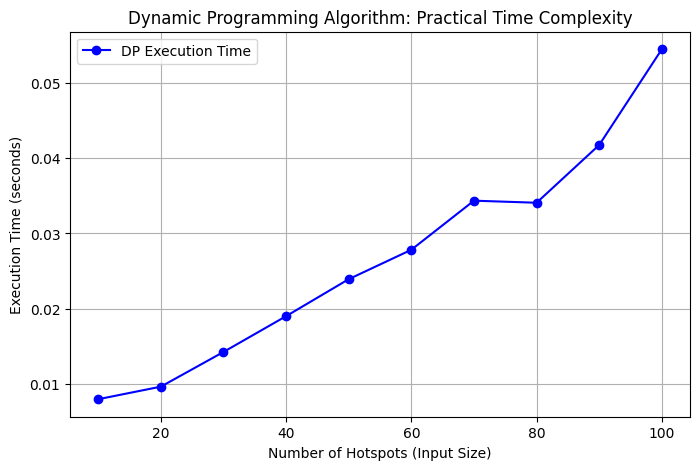

In [26]:

# Measure execution time as input size grows
input_sizes = list(range(10, len(hotspots) + 1, 10))  # Test from dataset sizes of 10 to 100 hotspots
execution_times = []

for size in input_sizes:
    test_subset = hotspots[:size]
    start_time = time.time()
    dp_max_priority(test_subset, battery_capacity)
    end_time = time.time()
    tot_time = end_time - start_time
    execution_times.append(tot_time)

# Plot the execution time vs input size graph
plt.figure(figsize=(8,5))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-', color='blue', label='DP Execution Time')
plt.xlabel('Number of Hotspots (Input Size)')
plt.ylabel('Execution Time (seconds)')
plt.title('Dynamic Programming Algorithm: Practical Time Complexity')
plt.legend()
plt.grid(True)
plt.show()


### Analysis

The graph above shows the practical time complexity of the Dynamic Programming algorithm when applied to the drone cleanup problem. As expected, the growth is linear in relation to the number of hotspots, given the fixed battery capacity of 1000. This confirms the theoretical time complexity of O(n×C) discussed earlier, where the number of hotspots (n) is the major contributor to runtime growth, since the capacity is constant.

# g) Final Analysis of Tradeoffs between Different Approaches

## Time Complexity

The brute force approach has a time complexity of
𝑂((2^n) * n) due to its need to evaluate all possible subsets of hotspots, making it infeasible for large datasets. Alternatively, the greedy method reduces the time to 𝑂(𝑛 log 𝑛) by sorting hotspots based on efficiency first then selecting them greedily, which greatly improves speed but does not guarantee an optimal solution.

However, the dynamic programming approach from Part II achieves O(n*C) time complexity, where n is the number of hotspots and C is the drone’s energy limit. This offers a practical balance, as the runtime grows linearly with input size and capacity, making it scalable and reliable for larger datasets.

## Space Complexity

The brute force algorithm required O(2^n) space to store subsets during exploration, which is not feasible for large n. The greedy approach used O(n) space, since it only stores the sorted hotspots from which the local optima is chosen from. Dynamic programming uses O(n*C) space to fill a 2D array of best results, which is efficient enough for real-world projects like this 100-hotspot dataset.

## Practical Feasibility / Optimality

- Brute force always finds the optimal solution but is too slow for large inputs as it becomes unusable after 15 hotspots due to exponential growth.
- Greedy is always going to be fast but may not find the most optimal solution.
- Dynamic programming guarantees optimality, just like brute force, but is efficient enough to handle larger datasets — thus making it both feasible and reliable for this problem.

# Conclusion

All these approaches can be useful but given the circumstances of the problem being a 0/1 knapsack problem, the dynamic programming approach provides the most optimal solution (unlike the greedy algorithm) and runs at a much more considerable speed and takes up less space than the brute force approach especcially with the dataset being as large as 100 hotspots.